In [4]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from keras.layers import Dense
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 26)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import keras as k

ModuleNotFoundError: No module named 'keras'

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('kidney_disease.csv')
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.shape
df.drop('id', axis = 1, inplace = True)

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors="coerce")
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors="coerce")
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors="coerce")

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
df['diabetes_mellitus'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
df['coronary_artery_disease'].replace(to_replace='\tno' , value='no',inplace=True)
df['class'].replace(to_replace="ckd\t" ,value="ckd",inplace=True) 

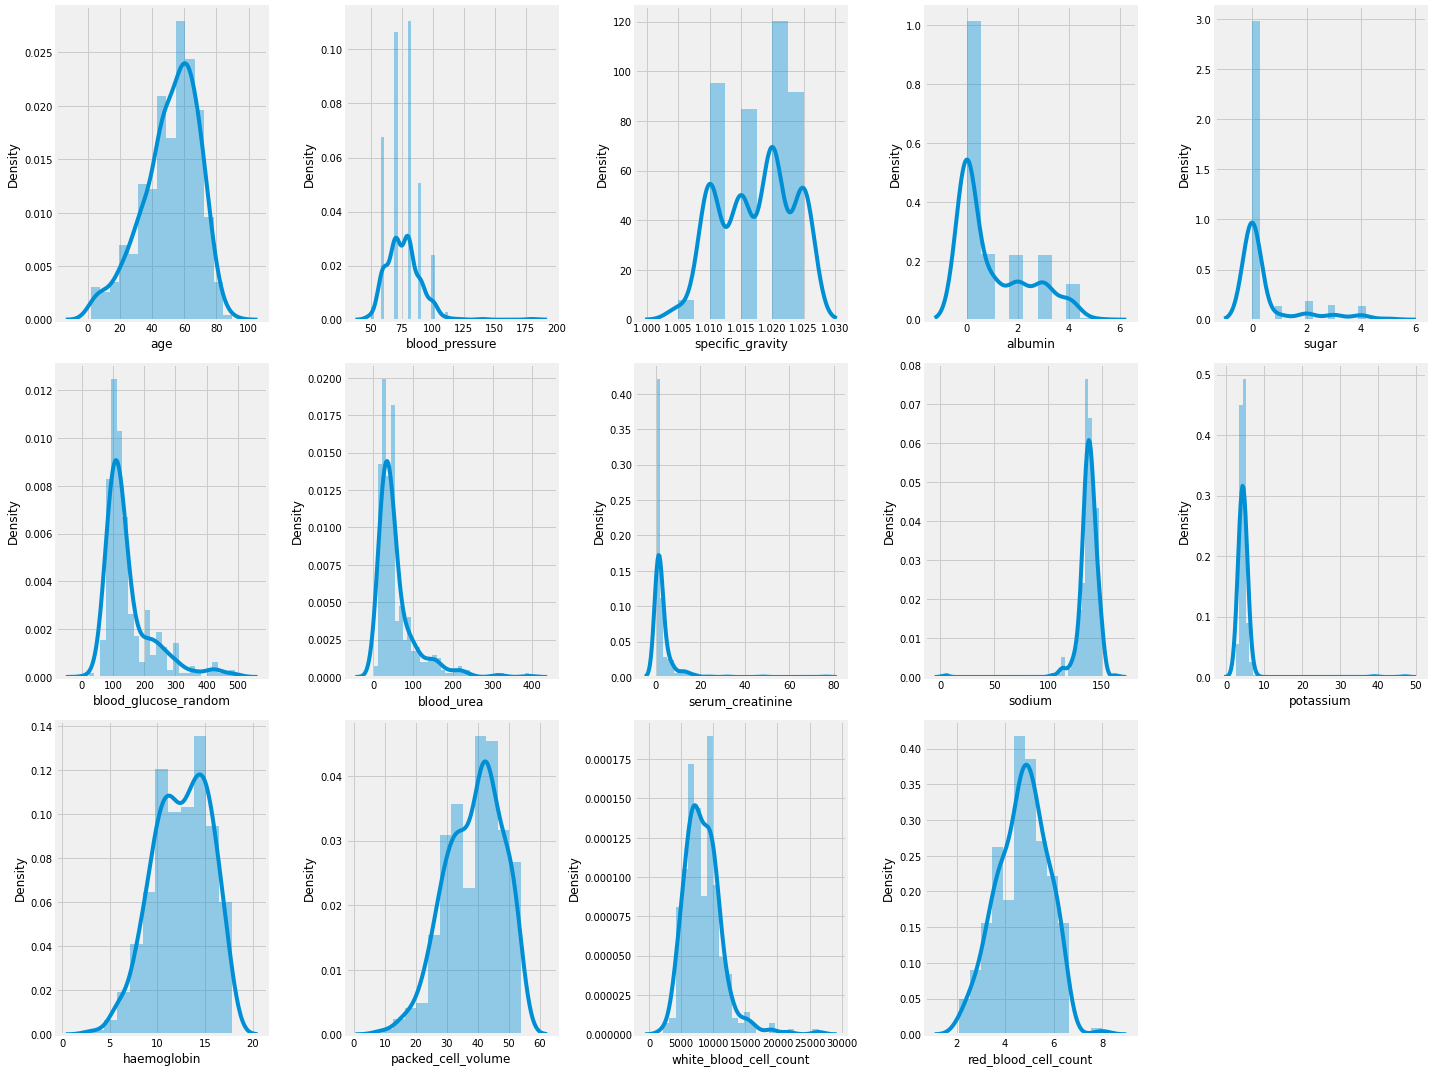

In [ ]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 19:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



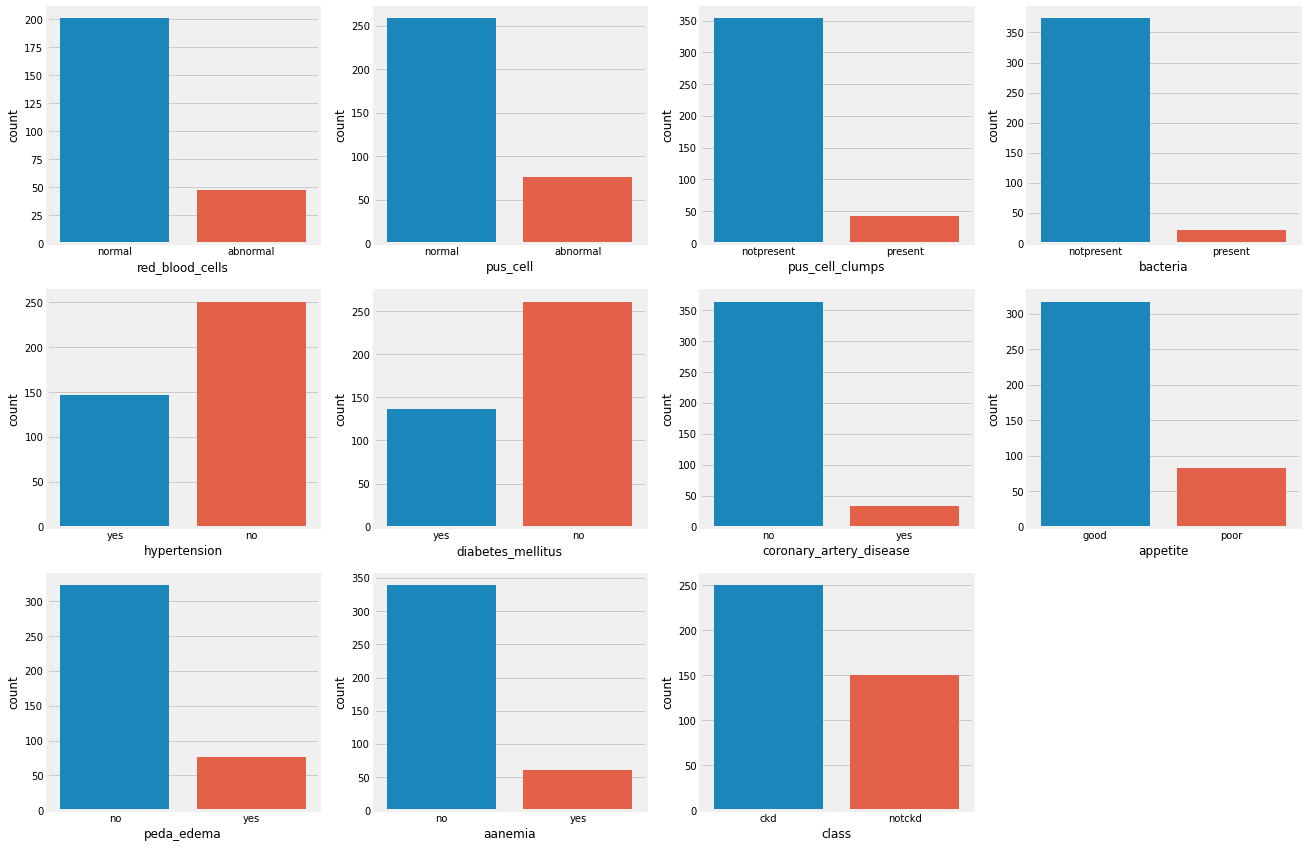

In [ ]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_cols):
    plt.subplot(4,4,i+1)
    sns.countplot(df[feature])

In [ ]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

In [ ]:
df.shape

(400, 25)

In [ ]:
data=df.copy()

In [ ]:
data[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

Random_value_imputation('pus_cell')
Random_value_imputation('red_blood_cells')
data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            4
bacteria                   4
hypertension               2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
peda_edema                 1
aanemia                    1
class                      0
dtype: int64

In [ ]:
def mode_imputation(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)
    
for col in cat_cols:
    mode_imputation(col)
    
data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
num_col=[col for col in df.columns if df[col].dtype!='object']
data[num_col].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
for col in num_col:
    Random_value_imputation(col)
    
data[num_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
data.groupby(['red_blood_cells','class'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])


count      mean  median  min  max
red_blood_cells class                                    
abnormal        ckd        74  4.278378     4.1  2.3  8.0
                notckd      3  5.566667     5.9  4.9  5.9
normal          ckd       176  4.390909     4.3  2.1  8.0
                notckd    147  5.352381     5.3  3.3  6.5

In [ ]:
px.violin(data,y='red_blood_cell_count',x="class", color="class")

In [ ]:
px.scatter(df,'haemoglobin','packed_cell_volume')

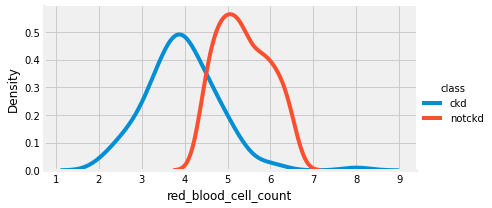

In [ ]:
grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red_blood_cell_count')
grid.add_legend()

In [ ]:
def violin(col):
    fig = px.violin(data, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2, color="class")
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

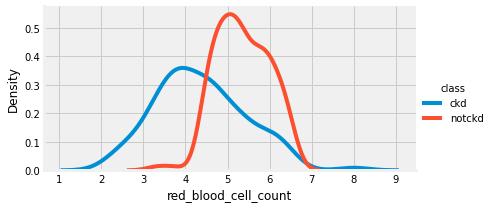

In [ ]:
kde_plot('red_blood_cell_count')

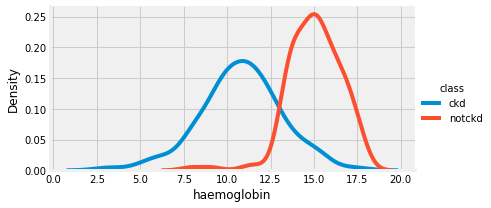

In [ ]:
kde_plot('haemoglobin')

In [ ]:
scatters('red_blood_cell_count', 'packed_cell_volume')

NameError: name 'scatters' is not defined

In [ ]:
scatters('red_blood_cell_count', 'haemoglobin')

In [ ]:
scatters('haemoglobin','packed_cell_volume')

In [ ]:
violin('red_blood_cell_count')

In [ ]:
violin('packed_cell_volume')

In [ ]:
fig = px.bar(data, x="specific_gravity", y="packed_cell_volume",
             color='class', barmode='group',
             height=400)
fig.show()


In [ ]:
for col in cat_cols:
    print('{} categories in the column- {} '.format(data[col].nunique(), col))

2 categories in the column- red_blood_cells 
2 categories in the column- pus_cell 
2 categories in the column- pus_cell_clumps 
2 categories in the column- bacteria 
2 categories in the column- hypertension 
2 categories in the column- diabetes_mellitus 
2 categories in the column- coronary_artery_disease 
2 categories in the column- appetite 
2 categories in the column- peda_edema 
2 categories in the column- aanemia 
2 categories in the column- class 


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cat_cols:
    data[col]=le.fit_transform(data[col])
    
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,139.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,118.0,18.0,0.8,134.0,3.5,11.3,38.0,6000.0,6.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,3.2,9.6,31.0,7500.0,4.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,141.0,3.9,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

ind_col=[col for col in data.columns if col!='class']
dep_col='class'

x=data[ind_col]
y=data[dep_col] 

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x,y)

datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

dfcolumns=pd.DataFrame(x.columns)

features_rank=pd.concat([dfcolumns,datascores],axis=1)

features_rank.columns=['Features','Score']
 

selected_columns=features_rank.nlargest(10,'Score')['Features'].values
X_new=data[selected_columns]
X_new

,white_blood_cell_count,blood_glucose_random,blood_urea,serum_creatinine,packed_cell_volume,albumin,haemoglobin,sugar,age,hypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,0.0,48.0,1
1,6000.0,118.0,18.0,0.8,38.0,4.0,11.3,0.0,7.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,3.0,62.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,0.0,48.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,0.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,140.0,49.0,0.5,47.0,0.0,15.7,0.0,55.0,0
396,7800.0,75.0,31.0,1.2,54.0,0.0,16.5,0.0,42.0,0
397,6600.0,100.0,26.0,0.6,49.0,0.0,15.8,0.0,12.0,0
398,7200.0,114.0,50.0,1.0,51.0,0.0,14.2,0.0,17.0,0


In [ ]:
!pip3 install catboost 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.9, random_state= 292)
# 123 , 0.7

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

from sklearn.neighbors import KNeighborsClassifier

names = [
    "CatBoostClassifier",
    "Support Vector Machine",
    "Decision Tree",
    "ANN",
    "Random Forest",
    "K nearest Neighbors"
]
models = [
    CatBoostClassifier(verbose= False),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

accuracy=[]

Confusion matrix of  CatBoostClassifier
[[26  2]
 [ 1 11]]
Accuracy score is  0.925
Confusion matrix of  Support Vector Machine
[[28  0]
 [12  0]]
Accuracy score is  0.7
Confusion matrix of  Decision Tree
[[27  1]
 [ 0 12]]
Accuracy score is  0.975
Confusion matrix of  ANN
[[28  0]
 [ 7  5]]
Accuracy score is  0.825
Confusion matrix of  Random Forest
[[27  1]
 [ 1 11]]
Accuracy score is  0.95
Confusion matrix of  K nearest Neighbors
[[15 13]
 [ 4  8]]
Accuracy score is  0.575


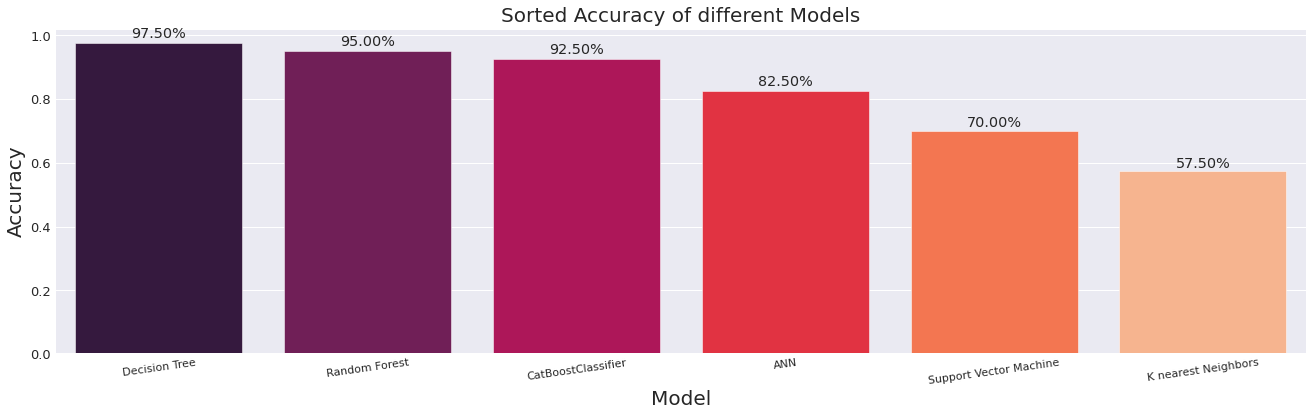

In [ ]:
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Sorted Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()